# 情報計測工学 課題1(解答)

課題1では，画像のヒストグラムを作成します．
0. [Google Colaboratoryの基本的な使い方](#scrollTo=ToMgdzHztsaD)
1. [画像処理の基本](#scrollTo=UbIM7kK8dEPm)
2. [課題1：ヒストグラムの作成](#scrollTo=82CpAZRNrnX1)

## 0. Google Colaboratoryの基本的な使い方

　まず，下記のプログラムを見てください．「a」という変数に1を代入したあと，「a」という変数をPrintしているプログラムになります．このプログラムを実行すると「1」と表示されます．

In [ ]:
a = 1
print(a)

1


　次に，下記のプログラムを見てください．「b」という変数に先程の「a」という変数を2倍したものを代入したあと，「b」という変数をPrintしているプログラムになります．このプログラムを実行すると「2」と表示されます．

　このように，Google Colaboratoryでは，このファイル内で記述したプログラムは全て共有されます．あとは，基本的に普通のPythonのプログラミングと同じになります．便利なツールですので，ぜひ使いこなして，たくさん勉強してみてください．

In [ ]:
b = a * 2
print(b)

2


## 1. 画像処理の基本

ここでは，画像処理の基本的なプログラム方法を理解して，課題に取り組んでもらいます．まず，画像ファイルを読み込んで，画面に表示してみましょう．下記のプログラムで，Google Colaboratory上に画像をアップロードすることができます．

In [ ]:
from google.colab import files                  # ファイルを読み込むためのライブラリをインポート．

uploaded_file = files.upload()                  # 選択したファイルをアップロード．
uploaded_file_name = next(iter(uploaded_file))  # アップロードしたファイルの名前を取得．
print(uploaded_file_name)                       # ファイル名の表示．

Saving lenna.bmp to lenna (2).bmp
lenna.bmp


下記のプログラムで，上のコードブロックでアップロードしたファイルを画像データとして読み込み，描画することができます．

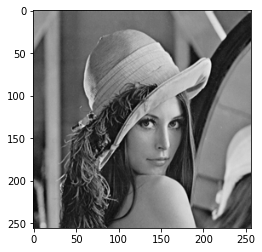

In [ ]:
import cv2                                      # 画像用のライブラリをインポート．
from matplotlib import pyplot as plt            # 描画用のライブラリをインポート．

img = cv2.imread(uploaded_file_name, 0)         # 画像ファイルを読み込む．
plt.imshow(img, cmap = "gray")                  # 読み込んだ画像の描画．

次に，読み込んだ画像の構成を確認してみましょう．下記のプログラムで，画像のサイズ，画像の[0, 0]の輝度値(画素値)，画像の全ピクセルの輝度値(画素値)をPrintすることができます．これらの情報を駆使して課題に取り組んでください．

In [ ]:
print("画像のサイズ\t\t：\t{0}\n".format(img.shape))    # 画像のサイズ．
print("画像[0, 0]の濃度値\t：\t{0}\n".format(img[0,0])) # 画像の[0, 0]の輝度値(画素値)．
print("画像全ピクセルの濃度値\t：\n{0}\n".format(img))  # 全ピクセルの輝度値(画素値)．

画像のサイズ		：	(256, 256)

画像[0, 0]の濃度値	：	161

画像全ピクセルの濃度値	：
[[161 161 160 ... 165 170 152]
 [161 161 161 ... 166 170 153]
 [161 160 157 ... 167 168 153]
 ...
 [ 52  58  56 ...  77  89  88]
 [ 49  52  53 ...  88  98  97]
 [ 47  56  57 ...  97 100 105]]



## 2. 課題1：ヒストグラムの作成

ダウンロードした画像の中から1つを選び，その画像の濃度ヒストグラムの作成を行ってもらいます．画像の色や明るさの濃淡の段階数を表す階調は256(0～255)です．課題1では，この256階調の画像に対して，32段階のヒストグラムを作成してもらいます．頻度の表示は100 個ごとに表示するようにしてください．

※ OpenCVなどの画像処理ライブラリは使用しないで実装してください．

In [ ]:
# ヒストグラムを格納するリスト(配列)を作成．
hist = [0] * 32

# 全ての画素を輝度値(画素値)ごとに分類し「hist」に格納．
for x in range(256):
  for y in range(256):

    # 【補足】小数点以下切り捨ての割り算は「//」を用いる．
    val = img[x][y] // 8

    hist[val] += 1

print("range freq")

# 「hist」からヒストグラムを描画(Print)する．
for i in range(32):

  # 【補足】桁数を揃えたい場合は「%d」の間に数字を入れる．(例：%3dで3桁揃え)
  print("%3d - %3d [%5d]: " % (8*i, (8*i)+7, hist[i]), end='');

  ast = hist[i] // 100

  for i in range(ast):

    # 【補足】Pythonの「print("○○")」は標準で改行する．
    #         「print("○○", end='')」と書くことで改行を無くすことができる．
    print("*", end='')

  print("")

range freq
  0 -   7 [    0]: 
  8 -  15 [    0]: 
 16 -  23 [    0]: 
 24 -  31 [   39]: 
 32 -  39 [  519]: *****
 40 -  47 [ 2296]: **********************
 48 -  55 [ 4405]: ********************************************
 56 -  63 [ 2955]: *****************************
 64 -  71 [ 1839]: ******************
 72 -  79 [ 1963]: *******************
 80 -  87 [ 2024]: ********************
 88 -  95 [ 2702]: ***************************
 96 - 103 [ 4097]: ****************************************
104 - 111 [ 2892]: ****************************
112 - 119 [ 3111]: *******************************
120 - 127 [ 4463]: ********************************************
128 - 135 [ 4180]: *****************************************
136 - 143 [ 4793]: ***********************************************
144 - 151 [ 4710]: ***********************************************
152 - 159 [ 4741]: ***********************************************
160 - 167 [ 2741]: ***************************
168 - 175 [ 2446]: **************